In [18]:
import rebound
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
from scipy.interpolate import interp1d
plt.style.use('paper.mplstyle')
%matplotlib inline

In [36]:
dfhadden = pd.read_csv("Kepler-23_default_priors.csv", index_col=0)
dfhadden.tail()

,mu0,per0,h0,k0,Tc0,mu1,per1,h1,k1,Tc1,...,e0,mean_long0,pomega1,e1,mean_long1,pomega2,e2,mean_long2,Z12,Z23
249995,0.000003,7.105870,-0.038511,-0.196506,57.031001,0.000006,10.743525,0.032910,-0.196457,55.659821,...,0.200244,6.120452,-1.404821,0.199195,5.147323,-1.075444,0.199238,4.333169,0.057631,0.052884
249996,0.000003,7.106110,-0.069445,0.025974,56.975209,0.000006,10.743671,0.000208,-0.003399,55.525812,...,0.074143,6.171487,-1.509681,0.003406,5.226137,-0.406624,0.062597,4.431526,0.048022,0.047269
249997,0.000004,7.106614,-0.001841,-0.075112,57.111239,0.000004,10.743291,0.044821,-0.081911,55.689775,...,0.075134,6.054789,-1.070109,0.093372,5.129095,-0.580675,0.077984,4.414196,0.039443,0.029061
249998,0.000003,7.106508,-0.087985,0.084049,56.927508,0.000004,10.743239,-0.016223,0.039809,55.475669,...,0.121678,6.216482,1.957768,0.042988,5.254157,0.894684,0.026970,4.517402,0.048540,0.025173
249999,0.000004,7.106154,-0.122730,-0.000055,56.853333,0.000009,10.743234,-0.046245,-0.023290,55.364239,...,0.122730,6.279559,-2.675062,0.051779,5.319310,-2.470655,0.004345,4.557613,0.045531,0.029906


In [2]:
df = pd.read_csv('Kepler-23_default_priors_uniform.csv', index_col=0)
df.tail()

,sim,Mstar,Z12,Zcom12,Z23,Zcom23,e1,e2,e3,mu1,mu2,mu3,mu1+mu2,mu2+mu3,mutot,t_instability,nbodystable,spockprob
27048,1999380.0,0.880613,0.201449,0.139535,0.102941,0.132488,0.198727,0.155031,0.014555,2.729311e-06,0.000012,0.000003,0.000015,0.000015,0.000018,5.358731e+04,0.0,0.007788
27049,1999466.0,1.214257,0.028842,0.012843,0.021864,0.008439,0.039781,0.010983,0.022669,8.367568e-07,0.000042,0.000007,0.000043,0.000049,0.000050,1.000000e+09,1.0,0.796429
27050,1999693.0,1.225737,0.075410,0.120734,0.066761,0.111895,0.088874,0.108052,0.175515,9.338099e-06,0.000078,0.000004,0.000087,0.000081,0.000091,6.319852e+04,0.0,0.005343
27051,1999943.0,1.083352,0.130139,0.262373,0.077109,0.180838,0.224166,0.236365,0.140135,1.474248e-06,0.000006,0.000018,0.000007,0.000024,0.000025,2.133985e+04,0.0,0.006733
27052,1999969.0,1.159434,0.046016,0.032291,0.051997,0.031372,0.095140,0.020418,0.050637,3.549245e-06,0.000037,0.000085,0.000040,0.000122,0.000125,5.152893e+05,0.0,0.012635


# First 10,000 rows are uniform draws so we can get the prior. After that, only systems that survive 1e4 orbits

<BarContainer object of 29 artists>

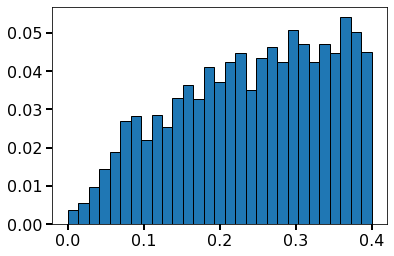

In [33]:
stable = df['nbodystable']==1

Nbins = 30
Zmax = 0.4
fig, ax = plt.subplots()
bins = np.linspace(0,Zmax,Nbins)
Nprior, edges = np.histogram(df.loc[:10000].Z12, density=True, bins=bins)
ax.bar(edges[:-1], Nprior/Nprior.sum(), width=np.diff(edges), edgecolor="black", align="edge")

Text(0.5, 1.0, 'Z12')

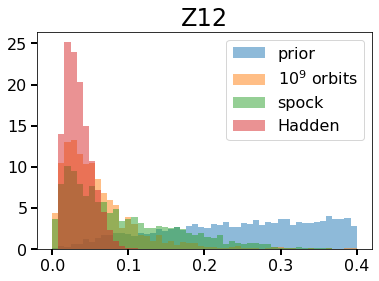

In [48]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(df.loc[:10000].Z12, alpha=0.5, density=True, label="prior", bins=50, range=[0,0.4])
ax.hist(df[stable].Z12, alpha=0.5, density=True, label=r"$10^9$ orbits", bins=bins)
ax.hist(df.Z12, alpha=0.5, density=True, bins=bins, label="spock", weights = df['spockprob'])
ax.hist(dfhadden.Z12, alpha=0.5, density=True, bins=bins, label="Hadden")
ax.legend()
ax.set_title("Z12")

Text(0.5, 1.0, 'e2')

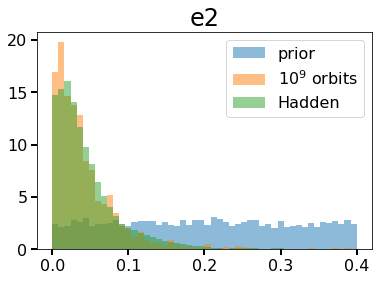

In [47]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(df.loc[:10000].e2, alpha=0.5, density=True, label="prior", bins=50, range=[0,0.4])
ax.hist(df[stable].e2, alpha=0.5, density=True, label=r"$10^9$ orbits", bins=bins)
#ax.hist(df.Z12, alpha=0.5, density=True, bins=bins, label="spock", weights = df['spockprob'])
ax.hist(dfhadden.e1, alpha=0.5, density=True, bins=bins, label="Hadden")
ax.legend()
ax.set_title("e2")

In [34]:
df.loc[139]

sim                 139.000000
Mstar                 1.164773
Z12                   0.163512
Zcom12                0.106347
Z23                   0.113550
Zcom23                0.071114
e1                    0.185096
e2                    0.103145
e3                    0.070585
mu1                   0.000002
mu2                   0.000018
mu3                   0.000005
mu1+mu2               0.000019
mu2+mu3               0.000023
mutot                 0.000025
t_instability    162693.320228
nbodystable           0.000000
spockprob             0.013039
Name: 139, dtype: float64

In [27]:
np.quantile(df[stable].Z12, 0.84)

0.10052591281638983

In [ ]:
cum = np.cumsum(f_stable/f)/(f_stable/f).sum()

In [26]:
f = interp1d(cum, edges[1:])
print("Z12 < {0:.3f} ({1:.3f} percentile)".format(f(percentile), percentile))

0.10052591281638983

Text(0.5, 1.0, 'Z23')

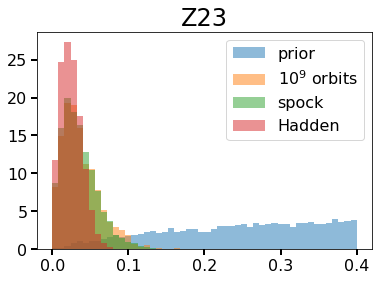

In [49]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(df.loc[:10000].Z23, alpha=0.5, density=True, label="prior", bins=50, range=[0,0.4])
ax.hist(df[stable].Z23, alpha=0.5, density=True, label=r"$10^9$ orbits", bins=bins)
ax.hist(df.Z23, alpha=0.5, density=True, bins=bins, label="spock", weights = df['spockprob'])
ax.hist(dfhadden.Z23, alpha=0.5, density=True, bins=bins, label="Hadden")
ax.legend()
ax.set_title("Z23")

Text(0.5, 1.0, 'Z23')

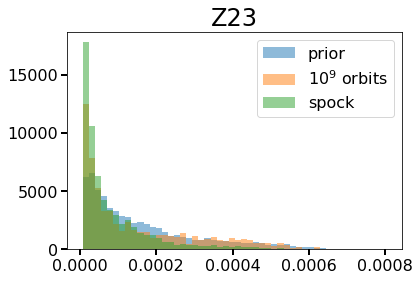

In [35]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(df.loc[:10000]['mu2+mu3'], alpha=0.5, density=True, label="prior", bins=50)
ax.hist(df[stable]['mu2+mu3'], alpha=0.5, density=True, label=r"$10^9$ orbits", bins=bins)
ax.hist(df['mu2+mu3'], alpha=0.5, density=True, bins=bins, label="spock", weights = df['spockprob'])
ax.legend()
ax.set_title("Z23")

Text(0.5, 0, '$Z_{12}$')

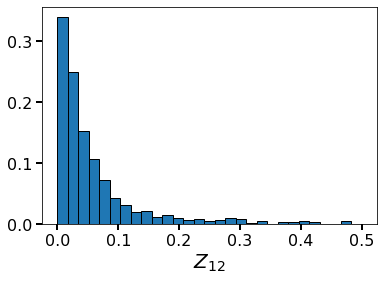

In [25]:
fig, ax = plt.subplots()
Nbins=30
bins = np.linspace(0, 0.5, Nbins)
f_stable, edges = np.histogram(df[stable].Z12, bins)
f, edges = np.histogram(df.Z12, bins)
ax.bar(edges[:-1], f_stable/f, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_xlabel(r'$Z_{12}$')

Text(0.5, 0, '$Z_{12}$')

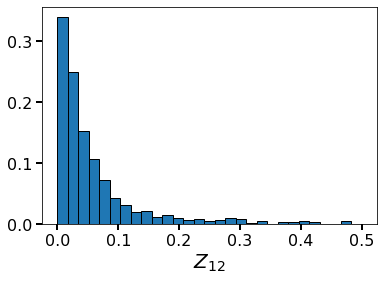

In [25]:
fig, ax = plt.subplots()
Nbins=30
bins = np.linspace(0, 0.5, Nbins)
f_stable, edges = np.histogram(dfhadden.Z12, bins)
f, edges = np.histogram(dfhadden.Z12, bins)
ax.bar(edges[:-1], f_stable/f, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_xlabel(r'$Z_{12}$')

Text(0.5, 0, '$Z_{12}$')

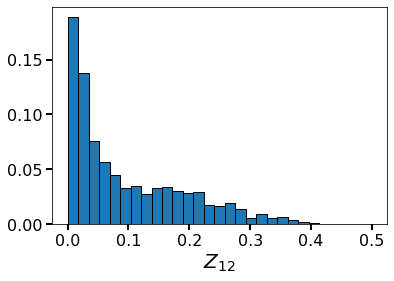

In [20]:
fig, ax = plt.subplots()
Nbins=30
bins = np.linspace(0, 0.5, Nbins)
f_stable, edges = np.histogram(df.Z12, bins, weights=df['spockprob'])
f, edges = np.histogram(df.Z12, bins)
ax.bar(edges[:-1], f_stable/f, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_xlabel(r'$Z_{12}$')

# Some N-body stable solutios for Z23 > 0.6! Check why

Text(0.5, 0, '$Z_{23}$')

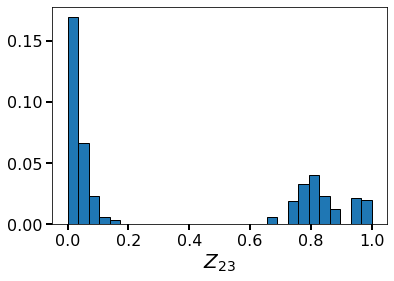

In [16]:
from scipy.interpolate import interp1d

fig, ax = plt.subplots()
Nbins=30
bins = np.linspace(0, 1, Nbins)
f_stable, edges = np.histogram(df.loc[df['nbodystable']==1].Z23, bins)
f, edges = np.histogram(df.Z23, bins)
ax.bar(edges[:-1], f_stable/f, width=np.diff(edges), edgecolor="black", align="edge")
ax.set_xlabel(r'$Z_{23}$')

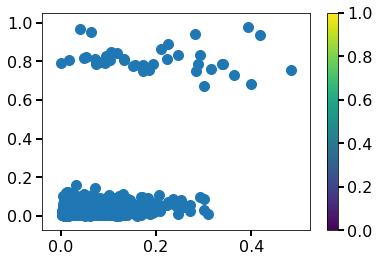

In [15]:
stable = df['nbodystable']==1

fig, ax = plt.subplots()
cb = ax.scatter(df[stable].Z12, df[stable].Z23)#,c=df3[stable].probstability)
fig.colorbar(cb)